In [3]:
import pandas as pd
import numpy as np
shipment = pd.read_parquet('../20_Intermediate_Files/mergedshipment.parquet', engine = 'fastparquet')
shipment.head()

,BUYER_STATE,BUYER_COUNTY,Year,QUANTITY,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,MME_Conversion_Factor,dos_str,Converted Units,STNAME,CTYNAME,State,Other abbreviations,County,Population,Opioids_per_Capita
index,,,,,,,,,,,,,,,,,
0,FL,ALACHUA,2006,54294.0,0.0,60803.410442,7333056.0,27070.0,279318.9940,8.259662e+07,Florida,Alachua County,Florida,FL,ALACHUA,239506.0,344.862420
1,FL,ALACHUA,2007,56118.0,0.0,69845.182455,8139364.0,28245.5,289063.3620,9.525963e+07,Florida,Alachua County,Florida,FL,ALACHUA,242685.0,392.523757
2,FL,ALACHUA,2008,64869.0,0.0,83284.874966,9100379.0,30504.0,325939.2345,1.146752e+08,Florida,Alachua County,Florida,FL,ALACHUA,244888.0,468.276199
3,FL,ALACHUA,2009,73351.0,0.0,101391.418612,10139373.0,31367.5,344488.2230,1.412810e+08,Florida,Alachua County,Florida,FL,ALACHUA,246657.0,572.783453
4,FL,ALACHUA,2010,74339.0,0.0,107176.406164,10072070.0,30733.0,338714.5390,1.509108e+08,Florida,Alachua County,Florida,FL,ALACHUA,247336.0,610.144847


In [4]:

# subset the data to only include the states of interest
shipment_sub = shipment[shipment['BUYER_STATE'].isin(["FL", "MI", "NC", "OH", "WA", "AZ", "MO", "GA"])].copy()

flor_ship= shipment_sub[shipment_sub["BUYER_STATE"].isin(["FL", "MI", "NC", "OH"])].copy()
wash_ship = shipment_sub[shipment_sub["BUYER_STATE"].isin(["WA", "MO", "GA", "AZ"])].copy()

flor_ship["case"] = np.where(flor_ship["BUYER_STATE"] == "FL", "Policy", "No policy")
wash_ship["case"] = np.where(wash_ship["BUYER_STATE"] == "WA", "Policy", "No policy")

flor_ship["policy"] = np.where(flor_ship["Year"] >= 2010, "post", "pre")
wash_ship["policy"] = np.where(wash_ship["Year"] >= 2011, "post", "pre")




In [5]:
# summary statistics for the shipment data
flor_ship.groupby(["case", "policy"]).agg({"Opioids_per_Capita": ["mean", "median", "std"]})


Opioids_per_Capita                        
                               mean      median         std
case      policy                                           
No policy post           418.362741  382.162658  208.869694
          pre            325.310784  287.256939  178.286935
Policy    post           533.197450  456.503337  332.258236
          pre            446.964534  388.738806  281.732133

In [6]:
# number of counties in florida
flor_ship.groupby(["case", "policy"]).agg({"BUYER_COUNTY": "nunique"})


BUYER_COUNTY
case      policy              
No policy post             251
          pre              251
Policy    post              67
          pre               67

In [7]:
wash_ship.groupby(["case", "policy"]).agg({"BUYER_COUNTY": "nunique"})

BUYER_COUNTY
case      policy              
No policy post             248
          pre              251
Policy    post              39
          pre               39

In [8]:
# opioid shipment per capita for florida and control states
flor_ship.groupby(["case"]).agg({"Opioids_per_Capita": ["mean", "median", "min", "max"]})


Opioids_per_Capita                                    
                        mean      median        min          max
case                                                            
No policy         377.006315  340.538620  41.786038  1721.500848
Policy            495.122532  437.193864  71.358182  2279.125735

In [9]:
#washington and the control states
wash_ship.groupby(["case"]).agg({"Opioids_per_Capita": ["mean", "median", "std", "count"]})

Opioids_per_Capita                               
                        mean      median         std  count
case                                                       
No policy         358.211613  315.602379  219.563424  51618
Policy            369.764357  336.179911  155.026593   7371

In [10]:

flor_ship.head(3)

,BUYER_STATE,BUYER_COUNTY,Year,QUANTITY,STRENGTH,CALC_BASE_WT_IN_GM,DOSAGE_UNIT,MME_Conversion_Factor,dos_str,Converted Units,STNAME,CTYNAME,State,Other abbreviations,County,Population,Opioids_per_Capita,case,policy
index,,,,,,,,,,,,,,,,,,,
0,FL,ALACHUA,2006,54294.0,0.0,60803.410442,7333056.0,27070.0,279318.9940,8.259662e+07,Florida,Alachua County,Florida,FL,ALACHUA,239506.0,344.862420,Policy,pre
1,FL,ALACHUA,2007,56118.0,0.0,69845.182455,8139364.0,28245.5,289063.3620,9.525963e+07,Florida,Alachua County,Florida,FL,ALACHUA,242685.0,392.523757,Policy,pre
2,FL,ALACHUA,2008,64869.0,0.0,83284.874966,9100379.0,30504.0,325939.2345,1.146752e+08,Florida,Alachua County,Florida,FL,ALACHUA,244888.0,468.276199,Policy,pre


In [11]:
# total quantity of opioids shipped to Florida pre and post policy
flor_ship.groupby(["case", "policy"]).agg({"Opioids_per_Capita": ["mean","median", "min", "max"]})


Opioids_per_Capita                                    
                               mean      median        min          max
case      policy                                                       
No policy post           418.362741  382.162658  54.647993  1721.500848
          pre            325.310784  287.256939  41.786038  1612.741266
Policy    post           533.197450  456.503337  71.358182  2279.125735
          pre            446.964534  388.738806  78.448363  1749.638838

In [12]:
wash_ship.groupby(["case", "policy"]).agg({"Opioids_per_Capita": ["mean", "median", "min", "max"]})
#washington_opioid_stats.to_csv("../30_Results/washington_opioid_stats.csv", index = False)

Opioids_per_Capita                                     
                               mean      median         min          max
case      policy                                                        
No policy post           426.201641  387.289865    3.883893  2088.375246
          pre            303.769782  268.439311    0.072905  2624.694673
Policy    post           387.888773  348.263792  135.226579   878.737776
          pre            355.264824  312.957338  101.379406   850.694206

In [13]:
# county with the highest opioid shipment per capita
flor_ship.groupby(["State","BUYER_COUNTY"]).agg({"Opioids_per_Capita": ["mean", "median", "min", "max"]}).sort_values(by = [("Opioids_per_Capita", "mean")], ascending = False).head(10)

Opioids_per_Capita                           \
                                          mean       median         min   
State          BUYER_COUNTY                                               
North Carolina COLUMBUS            1257.729989  1182.175382  811.275797   
Florida        HILLSBOROUGH        1105.643434  1004.104857  428.991005   
Ohio           JACKSON             1081.953155   937.572264  911.018054   
Florida        HERNANDO            1019.054380   944.301963  478.886164   
North Carolina SURRY               1011.511182  1052.907815  627.027247   
               CHEROKEE             968.131723  1037.902551  540.909438   
Florida        PASCO                947.949102   785.076048  484.147413   
               PINELLAS             920.687724   745.408816  529.082822   
               BROWARD              899.960652   835.155721  306.244107   
Michigan       OGEMAW               865.490144   837.412844  682.660256   

                                          
                                     max  
State          BUYER_COUNTY               
North Carolina COLUMBUS      1721.500848  
Florida        HILLSBOROUGH  2279.125735  
Ohio           JACKSON       1612.741266  
Florida        HERNANDO      1917.430634  
North Carolina SURRY         1304.853695  
               CHEROKEE      1360.027330  
Florida        PASCO         1638.929906  
               PINELLAS      1569.005395  
               BROWARD       1731.477441  
Michigan       OGEMAW        1172.178639

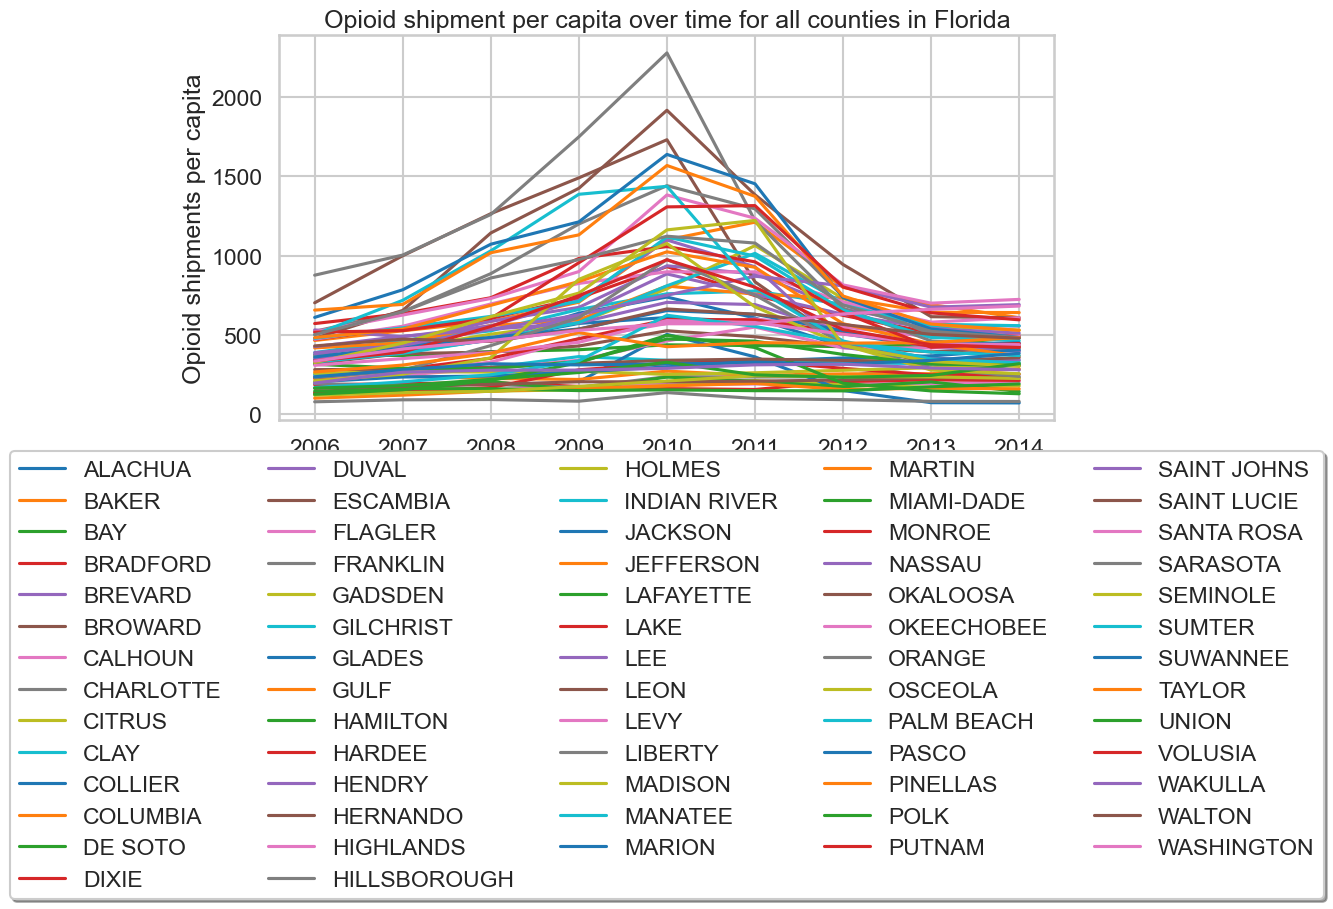

In [23]:
# subset for florida only
flor_ship_plot = flor_ship[flor_ship["BUYER_STATE"] == "FL"].copy()
# states opiod shipments over time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")




# death rate over time for all counties in florida depending on whether they had a policy or not

flor_ship_plot.groupby(["Year","BUYER_COUNTY"])["Opioids_per_Capita"].mean().unstack().plot(legend=False, figsize = (10,5))
# show the first 5 countries on the in the legenf with the highest Opoid shipment per capita
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

plt.title("Opioid shipment per capita over time for all counties in Florida")
plt.ylabel("Opioid shipments per capita")
plt.xlabel("Year")
plt.show()



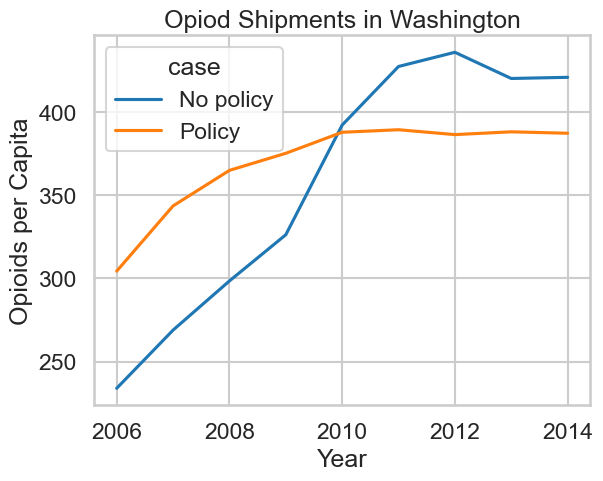

In [16]:
# states opiod shipments over time
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")

wash_ship.groupby(["Year", "case"])["Opioids_per_Capita"].mean().unstack().plot()
plt.title("Opiod Shipments in Washington")
plt.ylabel("Opioids per Capita")
plt.xlabel("Year")
plt.show()